In [ ]:
# https://zhuanlan.zhihu.com/p/692810462 RF
# https://zhuanlan.zhihu.com/p/692505141 SVM

# https://zhuanlan.zhihu.com/p/112009086 Xboost

In [1]:
setwd('/import/DB/fel/BJTC-204')

In [2]:
load('./bulk2.rda')

In [3]:
type = ifelse(group == 'MDD_S',1,0)

In [4]:
y = type

In [5]:
expr = exp1

In [6]:
colnames(expr) = gsub('-','.',colnames(expr))

In [7]:
#expr <- expr[, !grepl("^\\d+", names(expr))]

In [8]:
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [9]:
x = as.matrix(expr)
y = y

In [10]:
library(randomForest)

Warning message:
"package 'randomForest' was built under R version 4.2.3"
randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:dplyr':

    combine




png 
  2

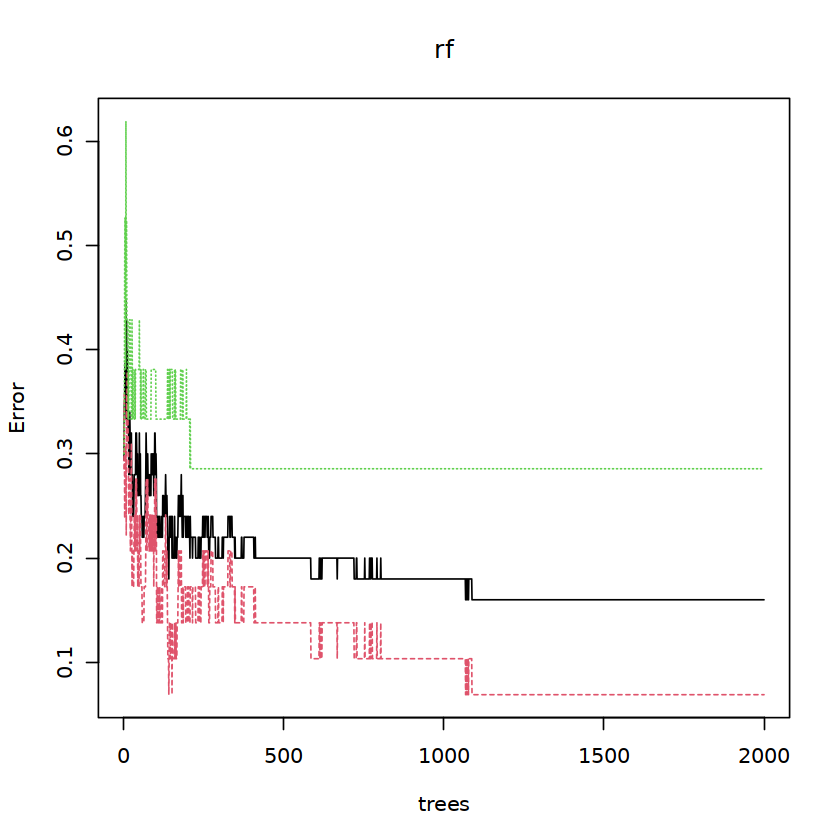

In [11]:
set.seed(11)

rf = randomForest(as.factor(y)~.,data = x,ntree =2000,important=TRUE,proximity=TRUE)

plot(rf)

pdf('forest.pdf',height = 6,width = 6)
plot(rf)
dev.off()

png 
  2

PLA2G5         CD28        TINAG       TXNDC2        ZFP36      SLC13A5 
  0.60279546   0.55586433   0.54438516   0.49972640   0.49587657   0.47229008 
         FOS         OXTR        RPE65       MOGAT1       TNFSF9        CD163 
  0.46011293   0.45873660   0.44711275   0.42350753   0.40519007   0.39616738 
       ADIRF     ARHGEF19       HAPLN3        NR4A1        PRLHR        CH25H 
  0.38219075   0.37724526   0.36000138   0.34938480   0.33544241   0.33520094 
       TKTL2         ATF3        IFNW1        AWAT1        KLRF1        WDR72 
  0.32526512   0.31029939   0.28868201   0.28607853   0.28307479   0.28240796 
       PTGDR         CCL2       DNAH12         PRF1         GBP2         EGR2 
  0.27397820   0.26899956   0.26300593   0.26128798   0.25517297   0.25390654 
      POU5F1         MICB        ECSCR         RELB        MTFR2        PLCZ1 
  0.25372837   0.25150386   0.25043718   0.24322472   0.24080563   0.23456476 
      TWIST1        P2RY8       CDKN1A        RAB38       CYP4B1 SLC25A21.AS1 
  0.22035269   0.21488073   0.21435527   0.21048786   0.21014880   0.20740907 
      GPRC5A       KCNJ16       CAPN11        CALCB         KLF4       HSPA1A 
  0.20671828   0.20189749   0.19695534   0.19441792   0.19409632   0.19172659 
       CCNJL       HSPA1B     HS3ST3B1       CXCL14     PPP1R15A       C2CD4A 
  0.19123063   0.18610314   0.18416751   0.18351482   0.17891001   0.17888980 
        IER3        PTGS2      C1QTNF1        WDR38      PLA2G4B        DNAH8 
  0.17840527   0.17492322   0.17135028   0.16961048   0.16726644   0.16437701 
     TRAPPC5         HCST       CLEC2B        SOCS3          ADM       DNAJB1 
  0.16407970   0.15891343   0.14897152   0.13936166   0.13766239   0.13727358 
        DIO2     C10orf62       KCTD11     C10orf95     CCDC102A       LRRC31 
  0.13724387   0.13639335   0.13231840   0.12858679   0.12835671   0.12803013 
         PNP        TRPM1      TMPRSS3         IL1A         RRAD        EPHA1 
  0.12678085   0.12237572   0.12188109   0.11970031   0.11841994   0.11784608 
        BTG2        TPSG1         DSG3        KLHL6        MUC17         AGR2 
  0.11710692   0.11255119   0.11195859   0.11086989   0.10689507   0.10516922 
       HSPA6      TNFAIP3          CRH         FOSB       TBXA2R        ECEL1 
  0.10482543   0.10032571   0.09881766   0.09602700   0.09512690   0.09510336 
   MAP1LC3B2        FBLN2        KRT12        C5AR1         EGR1     C1orf141 
  0.09502615   0.09462301   0.09458318   0.09171468   0.09133998   0.09110995 
         JUN     ADAMTS15       UNC5CL      ST8SIA2        CHRND     ADAMTS14 
  0.09033835   0.08923364   0.08827392   0.08780151   0.08776729   0.08684414 
       PRRX2         DRD3        CCRL2         SRGN        DUSP2      CD164L2 
  0.08660528   0.08381827   0.08331716   0.08095986   0.07987857   0.07912578 
     C2orf78        DUSP5     SERPINB2        RGS16      SLC34A2       COL4A1 
  0.07740791   0.07707412   0.07454078   0.06961172   0.06748721   0.06665289 
      TM4SF1       DUSP13        PLAUR    TNFRSF12A       PLA2G3          IL6 
  0.06370453   0.06344359   0.06141943   0.06073692   0.06069502   0.05967947 
        IL1B     C1orf127       RNASE2        RAB20         AREG        TOR4A 
  0.05549367   0.05541768   0.05271981   0.05161403   0.04630830   0.04496921 
         LCK        TFPI2         GRK7       CD300E         ESM1 
  0.04394873   0.04112898   0.03880076   0.03678672   0.02636715

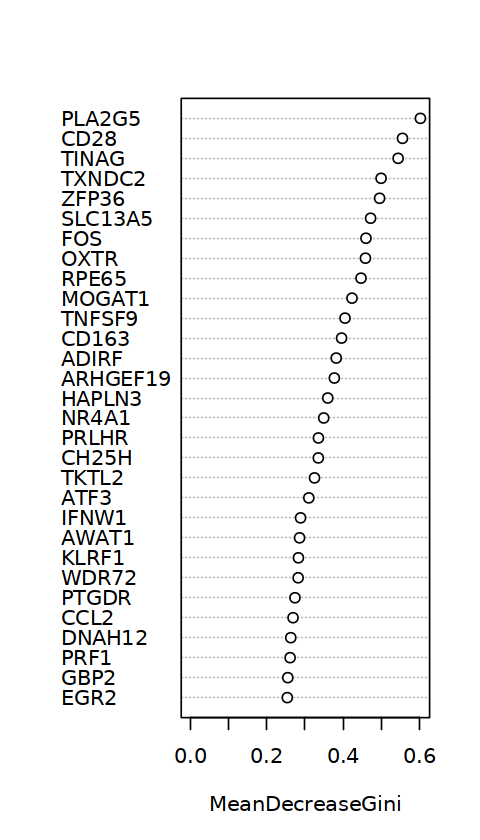

In [12]:


trees = which.min(rf$err.rate[,1])

rf = randomForest(as.factor(y)~.,data = x,ntree =trees,important=TRUE,proximity=TRUE)

importance = importance(rf)

pdf('forest2.pdf',height = 6,width = 4)
varImpPlot(rf,main = '')
dev.off()

# RPE65 + MC3R+NFIL3 + PRF1 + IL6

options(repr.plot.width = 4)

varImpPlot(rf,main = '')

rfGenes=importance[order(importance[, "MeanDecreaseGini"], decreasing  = TRUE),] #重要性评分大于2的基因

rfGenes

In [13]:
# rfGenes=names(rfGenes[rfGenes>30]) 
# write.table(rfGenes,file="rfGenes.txt",sep="\t",quote=F,col.names=F,row.names=F) #输出表达量

# # expr2 = exp4

# # sigExp=expr2[rfGenes,]
# # write.table(data.frame(ID=rownames(sigExp),sigExp),file="rfGeneExp.txt",sep="\t",quote=F,col.names=T,row.names=F) 

# # rfGenes

### svm

In [14]:
# library(tidyverse)
# library(glmnet)
# library(VennDiagram)
# library(e1071)
# library(caret)
# library(randomForest)

# x = as.matrix(expr)

# y=as.numeric(as.factor(Type))

# library(future)
# plan("multisession",workers=30)

# set.seed(1)
# rfeControl = rfeControl(functions = caretFuncs,
#                         method = "cv", # 默认自助法重采样 boot
#                         saveDetails = T, # 保存预测值和变量重要性
#                         number = 5, # 重抽样次数
#                         allowParallel = T # 允许多线程，用这个之前你要先准备好多线程！
#                         )

# Profile=rfe(x=x,y=as.factor(y),sizes =c(1:32),
#     rfeControl =  rfeControl,
#     methods="svmRadial")

# Profile

# pdf(file="SVM-RFE.pdf", width=6, height=5.5)
# par(las=1)
# x= Profile$results$Variables 
# y =Profile$results$RMSE
# plot(x, y, xlab="Variables", ylab="RMSE (Cross-Validation)", col="darkgreen") 
# lines(x, y, col="darkgreen")
# wmin=which.min(y) 
# wmin.x=x[wmin] 
# wmin.y=y[wmin]
# points(wmin.x, wmin.y, col="blue", pch=16)
# text(wmin.x, wmin.y, paste0('N=', wmin.x), pos=2, col=2)
# dev.off()

# par(las=1)
# x= Profile$results$Variables 
# y =Profile$results$RMSE
# plot(x, y, xlab="Variables", ylab="RMSE (Cross-Validation)", col="darkgreen") 
# lines(x, y, col="darkgreen")
# wmin=which.min(y) 
# wmin.x=x[wmin] 
# wmin.y=y[wmin]
# points(wmin.x, wmin.y, col="blue", pch=16)
# text(wmin.x, wmin.y, paste0('N=', wmin.x), pos=2, col=2)

# #输出
# featureGenes = Profile$optVariables
# write.table(file="SVM-RFE.gene.txt",featureGenes,sep="\t",quote=F,row.names=F,col.names=F) #表达矩阵 

# featureGenes

### Boruta

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
[39] 1 1 1 1 1 1 1 1 1 1 1 1

Boruta performed 299 iterations in 17.46668 secs.
 21 attributes confirmed important: ADIRF, ARHGEF19, ATF3, CD163, CD28
and 16 more;
 107 attributes confirmed unimportant: ADAMTS14, ADAMTS15, ADM, AGR2,
AREG and 102 more;
 3 tentative attributes left: CH25H, PRLHR, WDR72;


Tentative Confirmed  Rejected 
        3        21       107 

MOGAT1        PTGDR        TRPM1 SLC25A21.AS1        TINAG       DNAH12 
   Confirmed     Rejected     Rejected     Rejected    Confirmed     Rejected 
       ADIRF        IFNW1       CYP4B1     C10orf62        AWAT1     ADAMTS14 
   Confirmed     Rejected     Rejected     Rejected     Rejected     Rejected 
      UNC5CL      PLA2G4B        KRT12    MAP1LC3B2        WDR72        HSPA6 
    Rejected     Rejected     Rejected     Rejected    Tentative     Rejected 
         FOS         ATF3         CCL2       HSPA1A       HSPA1B       DNAJB1 
   Confirmed    Confirmed     Rejected     Rejected     Rejected    Confirmed 
        FOSB      TNFAIP3        CH25H        NR4A1         IL1B         RRAD 
    Rejected     Rejected    Tentative     Rejected     Rejected     Rejected 
      CDKN1A        ZFP36        RGS16          ADM          PNP     HS3ST3B1 
   Confirmed    Confirmed     Rejected     Rejected     Rejected     Rejected 
    PPP1R15A        PLAUR          JUN        PTGS2    TNFRSF12A         EGR2 
    Rejected     Rejected     Rejected     Rejected     Rejected    Confirmed 
       TFPI2        EPHA1       COL4A1       TM4SF1          IL6         IL1A 
    Rejected     Rejected     Rejected     Rejected     Rejected     Rejected 
       C5AR1      SLC13A5         GBP2         RELB         BTG2         OXTR 
    Rejected    Confirmed     Rejected    Confirmed     Rejected    Confirmed 
       CCRL2         CD28        SOCS3        MTFR2       TXNDC2      TMPRSS3 
    Rejected    Confirmed     Rejected     Rejected    Confirmed     Rejected 
        EGR1       CXCL14        CALCB         SRGN         AREG       TNFSF9 
    Rejected     Rejected     Rejected     Rejected     Rejected    Confirmed 
        PRF1        RPE65        CCNJL         KLF4      C1QTNF1        PLCZ1 
    Rejected    Confirmed     Rejected     Rejected     Rejected     Rejected 
      CLEC2B        TKTL2         IER3        RAB38        WDR38         MICB 
    Rejected     Rejected     Rejected    Confirmed     Rejected     Rejected 
        DIO2        DUSP2         ESM1       PLA2G5      ST8SIA2         GRK7 
    Rejected     Rejected     Rejected    Confirmed     Rejected     Rejected 
       ECSCR      C2orf78        DUSP5       KCNJ16       CAPN11       GPRC5A 
    Rejected     Rejected     Rejected     Rejected     Rejected     Rejected 
      PLA2G3       HAPLN3     ADAMTS15       C2CD4A        RAB20     CCDC102A 
    Rejected    Confirmed     Rejected     Rejected     Rejected     Rejected 
       CHRND        MUC17        KLHL6         HCST        PRLHR       RNASE2 
    Rejected     Rejected     Rejected     Rejected    Tentative     Rejected 
       TPSG1     C1orf127          LCK        P2RY8       TBXA2R       TWIST1 
    Rejected     Rejected     Rejected     Rejected     Rejected     Rejected 
       FBLN2       KCTD11       CD300E      SLC34A2        DNAH8      TRAPPC5 
    Rejected     Rejected     Rejected     Rejected     Rejected     Rejected 
        AGR2     C1orf141        ECEL1         DRD3          CRH        PRRX2 
    Rejected     Rejected     Rejected     Rejected     Rejected     Rejected 
    SERPINB2      CD164L2     ARHGEF19        KLRF1        TOR4A       POU5F1 
    Rejected     Rejected    Confirmed     Rejected     Rejected     Rejected 
      LRRC31       DUSP13         DSG3        CD163     C10orf95 
    Rejected     Rejected     Rejected    Confirmed     Rejected 
Levels: Tentative Confirmed Rejected

Boruta performed 299 iterations in 17.46668 secs.
 21 attributes confirmed important: ADIRF, ARHGEF19, ATF3, CD163, CD28
and 16 more;
 107 attributes confirmed unimportant: ADAMTS14, ADAMTS15, ADM, AGR2,
AREG and 102 more;
 3 tentative attributes left: CH25H, PRLHR, WDR72;

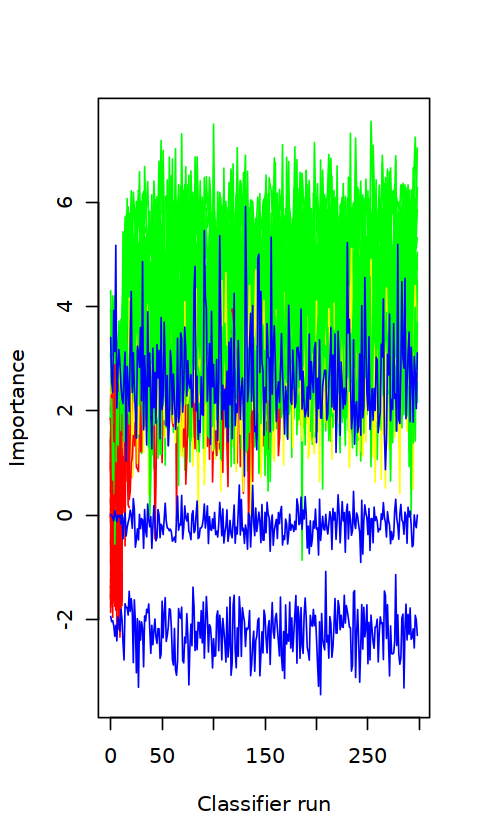

In [15]:
library(Boruta)

y

set.seed(111)
boruta <- Boruta(x=x, y=y, pValue=0.05, mcAdj=T, 
       maxRuns=300)

boruta

table(boruta$finalDecision)

boruta$finalDecision

Boruta::plotImpHistory(boruta)

library(dplyr)
boruta.imp <- function(x){
  imp <- reshape2::melt(x$ImpHistory, na.rm=T)[,-1]
  colnames(imp) <- c("Variable","Importance")
  imp <- imp[is.finite(imp$Importance),]

  variableGrp <- data.frame(Variable=names(x$finalDecision), 
                            finalDecision=x$finalDecision)

  showGrp <- data.frame(Variable=c("shadowMax", "shadowMean", "shadowMin"),
                        finalDecision=c("shadowMax", "shadowMean", "shadowMin"))

  variableGrp <- rbind(variableGrp, showGrp)

  boruta.variable.imp <- merge(imp, variableGrp, all.x=T)

  sortedVariable <- boruta.variable.imp %>% group_by(Variable) %>% 
    summarise(median=median(Importance)) %>% arrange(median)
  sortedVariable <- as.vector(sortedVariable$Variable)


  boruta.variable.imp$Variable <- factor(boruta.variable.imp$Variable, levels=sortedVariable)

  invisible(boruta.variable.imp)
}
boruta.variable.imp <- boruta.imp(boruta)


boruta

# library(YSX)

# sp_boxplot(boruta.variable.imp, melted=T, xvariable = "Variable", yvariable = "Importance",
#            legend_variable = "finalDecision", legend_variable_order = c("shadowMax", "shadowMean", "shadowMin", "Confirmed"),
#            xtics_angle = 90)

# expr = cbind(Type,expr)

# colnames(expr)[1]  ='Group'

# expr3 = expr

# set.seed(147)  
# index <-  which( (1:nrow(expr3))%%3 == 0 )
# train <- expr3[-index,]
# test <- expr3[index,]

# table(test$Group)

# library("xgboost")
# library("Matrix")
# train_matrix <- sparse.model.matrix(Group ~ .-1, data = train)
# test_matrix <- sparse.model.matrix(Group ~ .-1, data = test)
# all_matrix <- sparse.model.matrix(Group ~ .-1, data = expr3)



# train_label <- as.numeric(train$Group == 'MDD')
# test_label <-  as.numeric(test$Group == 'MDD')
# all_label <-  as.numeric(expr3$Group == 'MDD')

# all_label

# train_fin <- list(data=train_matrix,label=train_label) 
# test_fin <- list(data=test_matrix,label=test_label) 
# all_fin <- list(data=all_matrix,label=all_label) 

# dtrain <- xgb.DMatrix(data = train_fin$data, label = train_fin$label) 
# dtest <- xgb.DMatrix(data = test_fin$data, label = test_fin$label)
# dall <- xgb.DMatrix(data = all_fin$data, label = all_fin$label)

# xgb <- xgboost(data = dall,max_depth=6, eta=0.5,  
#   objective='binary:logistic', nround=25)

# xgb

# importance <- xgb.importance(all_matrix@Dimnames[[2]], model = xgb)  
# head(importance)
# xgb.ggplot.importance(importance)

# xgb.plot.importance(importance)

In [16]:
# lasso

[1] 0.06284886 0.10007316

[1] "MOGAT1"       "SLC25A21 AS1" "TINAG"        "ADIRF"        "CYP4B1"      
 [6] "AWAT1"        "PLA2G4B"      "KRT12"        "WDR72"        "CD28"        
[11] "TXNDC2"       "PRF1"         "CCNJL"        "PLCZ1"        "TKTL2"       
[16] "RAB38"        "TPSG1"        "TBXA2R"       "TWIST1"       "DNAH8"       
[21] "DRD3"         "ARHGEF19"     "POU5F1"       "LRRC31"

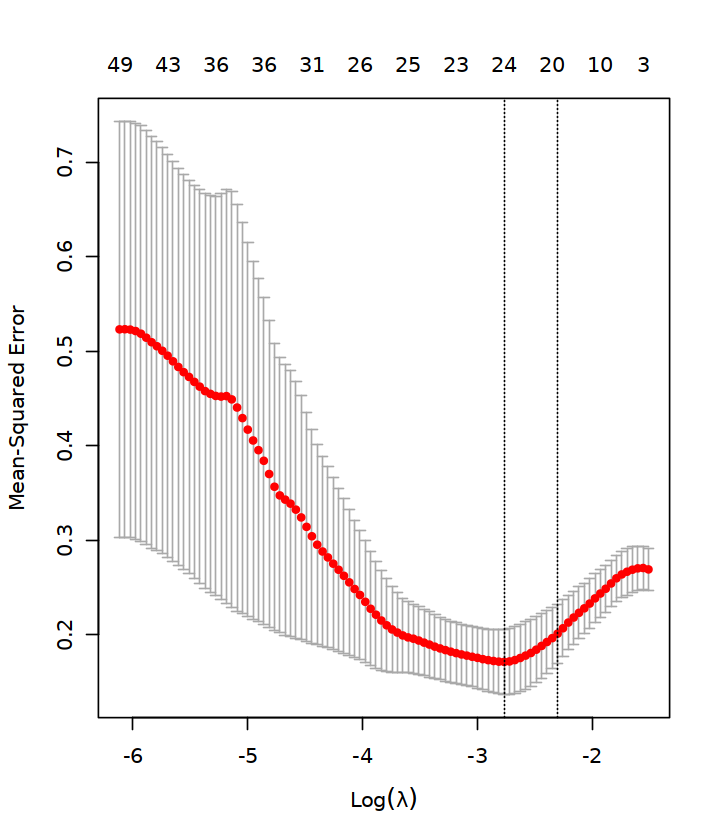

In [196]:
library(lars) 
library(glmnet) 

#用基因的表达情况预测生死
model_lasso <- glmnet(x, y, family="binomial", nlambda=100, alpha=1)#拉手回归模型
plot(model_lasso, xvar = "norm", label = TRUE)

plot(model_lasso, xvar="lambda", label=TRUE)

cv_fit <- cv.glmnet(x=x, y=y, alpha = 1, nlambda = 100)

plot(cv_fit)
# 两条虚线分别指示了两个特殊的λ值:
c(cv_fit$lambda.min,cv_fit$lambda.1se) 

model_lasso <- glmnet(x=as.matrix(x), y=y, alpha = 1, lambda=cv_fit$lambda.min	)
gene_1se <- rownames(model_lasso$beta)[as.numeric(model_lasso$beta)!=0]
gene_1se = gsub('[.]',' ',gene_1se)

gene_1se

# ### 韦恩图

# importance$Feature

# RF.gene = names(rfGenes)[1:10]
# #SVF.RFE.gene = featureGenes
# XGBoost.gene = importance$Feature[1:10]

# boruta.variable.imp2 = boruta.variable.imp %>% dplyr::filter(finalDecision %in% c('Confirmed','Tentative')) %>% dplyr::select(Variable) %>% unique()

# Boruta.gene = as.vector(boruta.variable.imp2$Variable)

# lasso.gene  = gene_1se

# list1 = list(RF.gene,lasso.gene,Boruta.gene,XGBoost.gene)

# data =  as.data.frame (do.call (cbind, list1))


# library(venn)
#         library(VennDiagram)
#         color=c( "#3C5488B2","#00A087B2", 
#              "#F39B7FB2","#91D1C2B2", 
#              "#8491B4B2", "#DC0000B2", 
#              "#7E6148B2","yellow", 
#              "darkolivegreen1", "lightskyblue", 
#              "darkgreen", "deeppink", "khaki2", 
#              "firebrick", "brown1", "darkorange1", 
#              "cyan1", "royalblue4", "darksalmon", 
#              "darkgoldenrod1", "darkseagreen", "darkorchid")

#     if (ncol(data) == 2){
#         sample_list <- list(c1 = data[,1], c2 = data[,2])
#     }else if(ncol(data) == 3){
#         sample_list <- list(RF.gene = data[,1], Boruta.gene = data[,2], XGBoost.gene = data[,3])
#     }else if(ncol(data) == 4){
#         sample_list <- list(RF.gene = data[,1], SVF.RFE.gene = data[,2], Boruta.gene = data[,3], XGBoost.gene = data[,4])
#     }else{
#         sample_list <- list(c1 = data[,1], c2 = data[,2], c3 = data[,3], c4 = data[,4], c5 = data[,5])
#     }
    
#     q <- venn.diagram(sample_list,filename = NULL,
#              fill = color[1:(length(sample_list))],
#              alpha = 0.50, cat.col = rep('black', ncol(data)), 
#              col = 'black', cex = 1, fontfamily = 'serif', cat.cex = 1, cat.fontfamily = 'serif', margin = 0.2
#                              )
#     pdf(paste0('./',"venn.pdf"))
#     grid.draw(q)
#     dev.off()

# grid.draw(q)

# intersect(intersect(intersect(RF.gene,XGBoost.gene),Boruta.gene),lasso.gene)

# model.gene = intersect(lasso.gene,XGBoost.gene)



# model.gene  =lasso.gene

# model.gene

In [339]:
set.seed(1234)

In [340]:
expr3 = cbind(y,x) %>%  as.data.frame()

In [341]:
colnames(expr3)[1] = 'Group'

In [342]:
expr4 = expr3 

In [343]:
dim(expr4)

[1]  50 132

In [344]:
model.gene = colnames(expr4)[2:dim(expr4)[2]]

In [345]:
head(expr4,7)

Group MOGAT1   PTGDR     TRPM1     SLC25A21.AS1 TINAG     DNAH12    ADIRF   
V1 0     0.000000  2.986890 0.0000000  7.467224    10.454114  7.467224 0.000000
V2 0     4.991855  4.991855 0.0000000  1.247964     4.991855  8.735747 1.247964
V3 0     4.857650  4.857650 2.4288249  9.715300    10.929712 10.929712 0.000000
V4 0     2.967336  8.902009 0.4239052  3.391242     5.510768  9.325915 1.271716
V5 0     4.335103 27.455655 1.4450345 10.115241     2.890069 11.560276 0.000000
V6 0     2.403822  9.615287 0.0000000  0.000000     2.403822 16.826751 0.000000
V7 0     3.142301  7.070177 7.8557526  5.499027     6.284602 14.140355 0.000000
   IFNW1     CYP4B1   ... CD164L2   ARHGEF19 KLRF1     TOR4A     POU5F1  
V1 2.9868897 0.000000 ... 0.0000000 4.480334 2.9868897  5.973779 2.986890
V2 3.7438916 0.000000 ... 3.7438916 3.743892 2.4959277  6.239819 2.495928
V3 6.0720622 0.000000 ... 0.0000000 0.000000 2.4288249  9.715300 4.857650
V4 0.8478104 3.391242 ... 1.6956208 3.391242 1.6956208 11.021535 3.815147
V5 2.8900690 1.445034 ... 1.4450345 1.445034 1.4450345 11.560276 1.445034
V6 4.8076433 0.000000 ... 2.4038216 4.807643 0.0000000 12.019108 2.403822
V7 5.4990268 0.000000 ... 0.7855753 3.142301 0.7855753  1.571151 1.571151
   LRRC31    DUSP13   DSG3     CD163     C10orf95
V1 1.4934448 1.493445 31.36234 46.296790 2.986890
V2 3.7438916 0.000000 11.23167  7.487783 3.743892
V3 3.6432373 0.000000 19.43060 21.859424 1.214412
V4 3.3912417 4.239052 30.94508 90.715715 5.086863
V5 7.2251725 2.890069 26.01062 62.136483 0.000000
V6 4.8076433 4.807643 50.48025 40.864968 0.000000
V7 0.7855753 0.000000 11.78363 19.639382 2.356726

In [346]:
library(caret)
library(ggplot2)

 a = c()
# 
for (i in model.gene){
    res<-pROC::roc(Group~expr4[,i],data=expr4,aur=TRUE,
         ci=TRUE, # 显示95%CI
         #percent=TRUE, # 是否需要以百分比显示
         smooth=FALSE,# 是否平滑曲线
         levels=c(0,1),direction="<" #设置分组方向
         )
    if (res$auc > 0.5){
        a = append(a,i)
        print(paste0(i,' ',res$auc))
        p = pROC::ggroc(res, color ="red",legacy.axes = TRUE)+
  geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color="darkgrey", linetype=4)+
  theme_bw() + # 设置背景
  ggtitle(paste0(i," ROC Curve"))+
  theme(plot.title = element_text(hjust = 0.5,size = 16),
        axis.text=element_text(size=12,colour = "black"),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14))
p+annotate("text",x=0.75,y=0.25,label=paste("AUC = ", round(res$auc,3)))+
  annotate("text",x=0.75,y=0.20,label=paste("95%CI: ", round(res$ci[1],3),'-',round(res$ci[3],3)))
    ggsave(file = paste0(i,'.ROC.pdf'))
}else{
        
}

    
    }

[1] "MOGAT1 0.747126436781609"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 51 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "PTGDR 0.673234811165846"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 50 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "TRPM1 0.660919540229885"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 42 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "SLC25A21.AS1 0.717569786535304"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 50 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "TINAG 0.756978653530378"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 51 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "DNAH12 0.725779967159278"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 51 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "ADIRF 0.743021346469622"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 34 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "IFNW1 0.717569786535304"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 51 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "CYP4B1 0.702791461412151"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 36 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "C10orf62 0.691297208538588"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 42 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "AWAT1 0.71264367816092"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 43 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "ADAMTS14 0.669950738916256"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 51 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "UNC5CL 0.602627257799672"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 51 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "PLA2G4B 0.694581280788177"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 51 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "KRT12 0.663382594417077"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 35 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "MAP1LC3B2 0.661740558292282"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 46 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "WDR72 0.670771756978654"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 34 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


### 批量单因素逻辑回归

In [347]:
a

[1] "MOGAT1"       "PTGDR"        "TRPM1"        "SLC25A21.AS1" "TINAG"       
 [6] "DNAH12"       "ADIRF"        "IFNW1"        "CYP4B1"       "C10orf62"    
[11] "AWAT1"        "ADAMTS14"     "UNC5CL"       "PLA2G4B"      "KRT12"       
[16] "MAP1LC3B2"    "WDR72"

In [348]:
boruta.variable.imp2 = boruta.variable.imp %>% dplyr::filter(finalDecision %in% c('Confirmed','Tentative')) %>% dplyr::select(Variable) %>% unique()
Boruta.gene = as.vector(boruta.variable.imp2$Variable)

In [349]:
Boruta.gene

[1] "ADIRF"    "ARHGEF19" "ATF3"     "CD163"    "CD28"     "CDKN1A"  
 [7] "CH25H"    "DNAJB1"   "EGR2"     "FOS"      "HAPLN3"   "MOGAT1"  
[13] "OXTR"     "PLA2G5"   "PRLHR"    "RAB38"    "RELB"     "RPE65"   
[19] "SLC13A5"  "TINAG"    "TNFSF9"   "TXNDC2"   "WDR72"    "ZFP36"

In [351]:
rf = names(rfGenes)[1:25]

In [352]:
rf

[1] "PLA2G5"   "CD28"     "TINAG"    "TXNDC2"   "ZFP36"    "SLC13A5" 
 [7] "FOS"      "OXTR"     "RPE65"    "MOGAT1"   "TNFSF9"   "CD163"   
[13] "ADIRF"    "ARHGEF19" "HAPLN3"   "NR4A1"    "PRLHR"    "CH25H"   
[19] "TKTL2"    "ATF3"     "IFNW1"    "AWAT1"    "KLRF1"    "WDR72"   
[25] "PTGDR"

In [244]:
gene_1se

[1] "MOGAT1"       "SLC25A21 AS1" "TINAG"        "ADIRF"        "CYP4B1"      
 [6] "AWAT1"        "PLA2G4B"      "KRT12"        "WDR72"        "CD28"        
[11] "TXNDC2"       "PRF1"         "CCNJL"        "PLCZ1"        "TKTL2"       
[16] "RAB38"        "TPSG1"        "TBXA2R"       "TWIST1"       "DNAH8"       
[21] "DRD3"         "ARHGEF19"     "POU5F1"       "LRRC31"

In [245]:
c = intersect(rf,Boruta.gene)

In [246]:
c

[1] "PLA2G5"   "CD28"     "TINAG"    "TXNDC2"   "ZFP36"    "SLC13A5" 
 [7] "FOS"      "OXTR"     "RPE65"    "MOGAT1"   "TNFSF9"   "CD163"   
[13] "ADIRF"    "ARHGEF19" "HAPLN3"   "PRLHR"    "CH25H"    "ATF3"

In [247]:
s  = intersect(Boruta.gene,gene_1se)

In [248]:
s

[1] "ADIRF"    "ARHGEF19" "CD28"     "MOGAT1"   "RAB38"    "TINAG"    "TXNDC2"  
[8] "WDR72"

In [409]:
b = intersect(a,rf)

In [410]:
b

[1] "MOGAT1" "PTGDR"  "TINAG"  "ADIRF"  "IFNW1"  "AWAT1"  "WDR72"

In [411]:
expr4 = expr3

In [412]:
expr4 = expr4[,c('Group',b)]

In [413]:
#expr4 = expr4

In [414]:
#结果合并需要的包
library(plyr)
#可进行logistic回归的包
library(rms)#可实现逻辑回归模型（lrm）
library(epiDisplay)#快速输出OR、95%CI、P
#library(gtsummary)#精美三线表（但，95%CI有误）

varsU<-names(expr4[,2:dim(expr4)[2]])

Result<-c()
for (i in 1:length(varsU)){
  fit<-glm(substitute(Group~x,list(x=as.name(varsU[i]))),data=expr4,family=binomial())
  fitSum<-summary(fit)
  result1<-c()
  result1<-rbind(result1,fitSum$coef)
  OR<-exp(fitSum$coef[,'Estimate'])
  result1<-data.frame(cbind(result1,cbind(OR,exp(confint(fit)))))
  result1$Characteristics<-varsU[i]   #添加变量名
  Result<-rbind(Result,result1[-1,])#[-1,],删除常数项
}

Result

Uni_log<-data.frame(Result[,c(1,4:8)]) #提取"P","OR","CIlower","CIupper"和变量名

colnames(Uni_log)[2:5]<-c("P","OR","CIlower","CIupper")#变量重命名

ExtractVar<-unique(Uni_log$Characteristics[Uni_log$"P"<0.05]) 

tzgene = Uni_log %>% dplyr::filter(P < 0.05) %>% rownames()

Uni_log[tzgene,]

### 多因素分析

tzgene

data = expr4[,c('Group',tzgene)]

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...



Estimate   Std..Error z.value  Pr...z..    OR       X2.5..    X97.5.. 
MOGAT1 0.47190865 0.1683410  2.803290 0.005058417 1.603051 1.1893899 2.318640
PTGDR  0.08499668 0.0638948  1.330260 0.183432714 1.088713 0.9992612 1.259448
TINAG  0.34053855 0.1268087  2.685451 0.007243195 1.405704 1.1240981 1.859161
ADIRF  0.80216204 0.3069766  2.613105 0.008972367 2.230358 1.2830162 4.363787
IFNW1  0.27840044 0.1144591  2.432314 0.015002681 1.321015 1.0791331 1.706430
AWAT1  0.40423744 0.1658430  2.437471 0.014790395 1.498160 1.1077375 2.145265
WDR72  0.65531265 0.3088232  2.121967 0.033840497 1.925745 1.0995299 3.723373
       Characteristics
MOGAT1 MOGAT1         
PTGDR  PTGDR          
TINAG  TINAG          
ADIRF  ADIRF          
IFNW1  IFNW1          
AWAT1  AWAT1          
WDR72  WDR72

Estimate  P           OR       CIlower  CIupper  Characteristics
MOGAT1 0.4719087 0.005058417 1.603051 1.189390 2.318640 MOGAT1         
TINAG  0.3405385 0.007243195 1.405704 1.124098 1.859161 TINAG          
ADIRF  0.8021620 0.008972367 2.230358 1.283016 4.363787 ADIRF          
IFNW1  0.2784004 0.015002681 1.321015 1.079133 1.706430 IFNW1          
AWAT1  0.4042374 0.014790395 1.498160 1.107737 2.145265 AWAT1          
WDR72  0.6553126 0.033840497 1.925745 1.099530 3.723373 WDR72

[1] "MOGAT1" "TINAG"  "ADIRF"  "IFNW1"  "AWAT1"  "WDR72"

In [415]:


# train_sub = sample(nrow(data),9/10*nrow(data))
# train_data = data[train_sub,]
# test_data =data[-train_sub,]

fit.reduce<-glm(Group~.,data=data,family=binomial())
summary(fit.reduce)

formatFit<-function(fit){
  #取P值
  p<-summary(fit)$coefficients[,4]
  #wald值
  wald<-summary(fit)$coefficients[,3]^2
  #B值
  valueB<-coef(fit)
  #OR值
  valueOR<-exp(coef(fit))
  #OR值得95%CI
  confitOR<-exp(confint(fit))
  data.frame(
    B=round(valueB,3),
    Wald=round(wald,3),
    OR_with_CI=paste(round(valueOR,3),"(",
               round(confitOR[,1],3),"~",round(confitOR[,2],3),")",sep=""),
    P=format.pval(p,digits = 3,eps=0.001)
  )
}

formatFit(fit.reduce)


Call:
glm(formula = Group ~ ., family = binomial(), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8813  -0.6232  -0.3272   0.5151   2.1063  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -6.510030   1.775540  -3.667 0.000246 ***
MOGAT1       0.254460   0.206731   1.231 0.218369    
TINAG        0.364457   0.154605   2.357 0.018407 *  
ADIRF        0.490295   0.460878   1.064 0.287406    
IFNW1        0.232943   0.152261   1.530 0.126041    
AWAT1       -0.004148   0.252555  -0.016 0.986895    
WDR72        0.653358   0.454784   1.437 0.150821    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 68.029  on 49  degrees of freedom
Residual deviance: 40.497  on 43  degrees of freedom
AIC: 54.497

Number of Fisher Scoring iterations: 5


Waiting for profiling to be done...



B      Wald   OR_with_CI         P     
(Intercept) -6.510 13.443 0.001(0~0.03)      <0.001
MOGAT1       0.254  1.515 1.29(0.876~2.022)  0.218 
TINAG        0.364  5.557 1.44(1.102~2.045)  0.018 
ADIRF        0.490  1.132 1.633(0.677~4.321) 0.287 
IFNW1        0.233  2.341 1.262(0.947~1.756) 0.126 
AWAT1       -0.004  0.000 0.996(0.591~1.643) 0.987 
WDR72        0.653  2.064 1.922(0.847~5.29)  0.151

In [416]:
fit.reduce<-glm(Group~. ,data=data,family=binomial())
summary(fit.reduce)


Call:
glm(formula = Group ~ ., family = binomial(), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8813  -0.6232  -0.3272   0.5151   2.1063  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -6.510030   1.775540  -3.667 0.000246 ***
MOGAT1       0.254460   0.206731   1.231 0.218369    
TINAG        0.364457   0.154605   2.357 0.018407 *  
ADIRF        0.490295   0.460878   1.064 0.287406    
IFNW1        0.232943   0.152261   1.530 0.126041    
AWAT1       -0.004148   0.252555  -0.016 0.986895    
WDR72        0.653358   0.454784   1.437 0.150821    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 68.029  on 49  degrees of freedom
Residual deviance: 40.497  on 43  degrees of freedom
AIC: 54.497

Number of Fisher Scoring iterations: 5


In [417]:
logit.step <- step(fit.reduce,direction='both')
summary(logit.step)

Start:  AIC=54.5
Group ~ MOGAT1 + TINAG + ADIRF + IFNW1 + AWAT1 + WDR72

         Df Deviance    AIC
- AWAT1   1   40.498 52.498
- ADIRF   1   41.676 53.676
- MOGAT1  1   42.135 54.135
<none>        40.497 54.497
- WDR72   1   42.871 54.871
- IFNW1   1   43.002 55.002
- TINAG   1   48.088 60.088

Step:  AIC=52.5
Group ~ MOGAT1 + TINAG + ADIRF + IFNW1 + WDR72

         Df Deviance    AIC
- ADIRF   1   42.070 52.070
- MOGAT1  1   42.142 52.142
<none>        40.498 52.498
- IFNW1   1   43.122 53.122
- WDR72   1   43.131 53.131
+ AWAT1   1   40.497 54.497
- TINAG   1   48.264 58.264

Step:  AIC=52.07
Group ~ MOGAT1 + TINAG + IFNW1 + WDR72

         Df Deviance    AIC
<none>        42.070 52.070
+ ADIRF   1   40.498 52.498
- IFNW1   1   45.391 53.391
+ AWAT1   1   41.676 53.676
- WDR72   1   45.748 53.748
- MOGAT1  1   46.584 54.584
- TINAG   1   49.736 57.736



Call:
glm(formula = Group ~ MOGAT1 + TINAG + IFNW1 + WDR72, family = binomial(), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1673  -0.6599  -0.2984   0.5159   2.0277  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -6.5651     1.7993  -3.649 0.000264 ***
MOGAT1        0.3558     0.1851   1.922 0.054658 .  
TINAG         0.3678     0.1548   2.375 0.017531 *  
IFNW1         0.2429     0.1427   1.702 0.088696 .  
WDR72         0.7503     0.4269   1.758 0.078795 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 68.029  on 49  degrees of freedom
Residual deviance: 42.070  on 45  degrees of freedom
AIC: 52.07

Number of Fisher Scoring iterations: 5


In [418]:
# train_sub = sample(nrow(data),9/10*nrow(data))
# train_data = data[train_sub,]
# test_data =data[-train_sub,]

# fit.reduce<-glm(Group~.,data=data,family=binomial())
# summary(fit.reduce)

formatFit<-function(fit){
  #取P值
  p<-summary(fit)$coefficients[,4]
  #wald值
  wald<-summary(fit)$coefficients[,3]^2
  #B值
  valueB<-coef(fit)
  #OR值
  valueOR<-exp(coef(fit))
  #OR值得95%CI
  confitOR<-exp(confint(fit))
  data.frame(
    B=round(valueB,3),
    Wald=round(wald,3),
    OR_with_CI=paste(round(valueOR,3),"(",
               round(confitOR[,1],3),"~",round(confitOR[,2],3),")",sep=""),
    P=format.pval(p,digits = 3,eps=0.001)
  )
}

formatFit(logit.step)

Waiting for profiling to be done...



B      Wald   OR_with_CI         P     
(Intercept) -6.565 13.312 0.001(0~0.029)     <0.001
MOGAT1       0.356  3.692 1.427(1.026~2.163) 0.055 
TINAG        0.368  5.642 1.445(1.103~2.041) 0.018 
IFNW1        0.243  2.898 1.275(0.983~1.752) 0.089 
WDR72        0.750  3.090 2.118(0.985~5.472) 0.079

In [419]:
b = rownames(formatFit(logit.step))[2:length(rownames(formatFit(logit.step)))]

Waiting for profiling to be done...

Waiting for profiling to be done...



In [420]:
#save(b,file = 'b.rda')

In [421]:
data = data[,c('Group',b)]

In [422]:
library(autoReg)

In [423]:
overall.log =  glm(Group~.,data=data,family=binomial())

model3<-autoReg(overall.log,uni=TRUE,milti=TRUE,threshold=0.05)

model3

name   desc             0 (N=29)         1 (N=21)         id    
1 MOGAT1 Mean <U+00B1> SD 3.2 <U+00B1> 1.6 5.3 <U+00B1> 2.6 MOGAT1
2 TINAG  Mean <U+00B1> SD 6.0 <U+00B1> 2.5 8.6 <U+00B1> 3.3 TINAG 
3 IFNW1  Mean <U+00B1> SD 4.4 <U+00B1> 2.5 6.8 <U+00B1> 3.6 IFNW1 
4 WDR72  Mean <U+00B1> SD 0.8 <U+00B1> 0.9 1.5 <U+00B1> 1.3 WDR72 
  OR (univariable)         OR (multivariable)      
1 1.60 (1.15-2.23, p=.005) 1.43 (0.99-2.05, p=.055)
2 1.41 (1.10-1.80, p=.007) 1.44 (1.07-1.96, p=.018)
3 1.32 (1.06-1.65, p=.015) 1.27 (0.96-1.69, p=.089)
4 1.93 (1.05-3.53, p=.034) 2.12 (0.92-4.89, p=.079)

In [424]:
save(b,file  = 'b.rda')

In [425]:
library(caret)

In [426]:
set.seed(111)
#单纯10折交叉验证，time=1
folds <-createMultiFolds(y=data$Group,k=3,times=10)
#10次批量训练与验证
#做成循环
auc_value<-as.numeric()
for(i in 1:10){
  train<- data[ folds[[i]],] 
  test <- data[-folds[[i]],] 
  model<-glm(Group~.,data=train,family=binomial())  #TNFSF14+CCNA2+MARCKS+SGOL1+SAP130
    
  model_pre<-predict(model,type='response', newdata=test)
    
  auc_value<- append(auc_value,
                     as.numeric(pROC::auc(as.numeric(test[,1]),model_pre)))
}
mean(auc_value)

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] 0.7900216

In [427]:
auc_value

[1] 0.7571429 0.6142857 0.9841270 0.7833333 0.9142857 0.8333333 0.5303030
 [8] 0.9206349 0.8484848 0.7142857

In [434]:
num <- which.max(auc_value)
print(num)

fold_test <- data[folds[[num]],]   
fold_train <- data[-folds[[num]],]

fold_pre <- glm(Group~.,data=fold_test,family=binomial())

fold_predict <- predict(fold_pre,type='response',newdata=data)

options(repr.plot.width = 6)

[1] 3


In [435]:
roc_curve <- pROC::roc(as.numeric(data$Group),fold_predict)
plot(roc_curve, print.auc=TRUE, auc.polygon=TRUE, grid=c(0.1, 0.2),
     grid.col=c("green", "red"), max.auc.polygon=TRUE,
     auc.polygon.col="skyblue", print.thres=TRUE,main="")

Setting levels: control = 0, case = 1

Setting direction: controls < cases

